# Insight One: 
    
  - Declining Quality over Time
    -  defined by both what you can get (lift) for the movie and audience rating

In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd


sys.path.append("..")
from src.make_data import add_metrics
from src.plots import plot_median_movie_lift_over_time, plot_median_movie_score_over_time, colors_zebra_interview

sys.tracebacklimit = 0 # easier to see problems
plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
df = pd.read_csv("..//data/raw/the_zebra_movie_data.csv")
print(df.shape)

df = add_metrics(df)

(5043, 26)
shape - (5043, 30), columns added - ['lift', 'budget_log', 'gross_log', 'decade']


## Eras in Movies

* rounding up to decades makes sense as it roughly fits the eras in movies

| Era                               | Characteristics                                                                                   | Notable Figures                      | Key Films                                         | Innovations/Trends                           | Estimated Number of Movies |
|-----------------------------------|---------------------------------------------------------------------------------------------------|---------------------------------------|--------------------------------------------------|----------------------------------------------|---------------------------|
| **Silent Era (1890s–1920s)**      | Silent films with live music or intertitles.                                                     | Charlie Chaplin, Buster Keaton       | *The Birth of a Nation* (1915), *Metropolis* (1927) | Early cameras, projection, editing.          | ~10,000–20,000           |
| **Golden Age (1930s–1940s)**      | Dominance of studios, genre films (musicals, westerns, noir).                                    | Humphrey Bogart, Katharine Hepburn   | *Gone with the Wind* (1939), *Casablanca* (1942) | Sound ("talkies"), Technicolor.              | ~50,000–75,000           |
| **Post-War Movements (1940s–50s)**| Darker themes, rise of international cinema (Neorealism, Film Noir, Japanese Golden Age).        | Akira Kurosawa, Vittorio De Sica     | *Bicycle Thieves* (1948), *Seven Samurai* (1954) | Portable cameras, natural lighting.          | ~40,000–60,000           |
| **New Hollywood (1960s–70s)**     | Auteur-driven, experimental, societal challenges.                                               | Martin Scorsese, Francis Coppola     | *The Godfather* (1972), *Star Wars* (1977)      | Blockbusters, innovative special effects.    | ~60,000–80,000           |
| **Blockbuster Era (1980s–90s)**   | High-concept films, franchises, global appeal.                                                  | James Cameron, Steven Spielberg      | *E.T.* (1982), *Titanic* (1997), *Jurassic Park* (1993) | CGI, improved sound systems, marketing.      | ~100,000–150,000         |
| **Digital Era (2000s–Present)**   | Dominance of digital editing, streaming platforms, global cinema.                               | Christopher Nolan, Bong Joon-ho      | *The Lord of the Rings* (2001–03), *Parasite* (2019) | Advanced CGI, motion capture, 3D, streaming. | ~200,000+                |

## Notable Film Movements
| Movement                | Characteristics                                                                                 | Key Films                          | Estimated Number of Movies |
|-------------------------|-------------------------------------------------------------------------------------------------|------------------------------------|----------------------------|
| **French New Wave**     | Experimental, stylistic freedom (*1950s–1960s*).                                               | *Breathless* (1960), *The 400 Blows* (1959) | ~500–1,000              |
| **German Expressionism**| Highly stylized, dark themes (*1920s*).                                                        | *The Cabinet of Dr. Caligari* (1920) | ~200–300                |
| **Dogme 95**            | Minimalist filmmaking, strict rules (*1990s*).                                                | Lars von Trier films (*Breaking the Waves*, 1996) | ~100–200               |

[Source: History of Film](https://en.wikipedia.org/wiki/History_of_film)

validated on wikipedia and taken from ChatGPT


In [3]:
## validation -- IMDB has about 600,000 movie titles as of September 2024 (looks like a reasonable estimate compared to imbd)
assert (20000 + 75000 + 60000 + 80000 + 150000 + 200000) > 0.9 * 600000, 'estimate is more than 10% off base'

## Movie Year

*  Understand where its missing
*  useful to group into decades or eras

In [4]:
print("We have Movie data from {} to {}".format(df["title_year"].min().astype(int), df["title_year"].max().astype(int)))

df["decade"].value_counts().to_frame("count").reset_index().sort_values("decade",ascending=False)


We have Movie data from 1916 to 2016


,decade,count
5,9990,108
1,2010,1497
0,2000,2100
2,1990,786
3,1980,291
4,1970,114
6,1960,73
7,1950,28
8,1940,25
9,1930,15


In [5]:
# what was the 1916 movie? out of curiosity 
df.loc[df["title_year"] == 1916].T

,4810
color,Black and White
director_name,D.W. Griffith
num_critic_reviews,69.0
duration,123.0
director_facebook_likes,204.0
actor_3_facebook_likes,9.0
actor_2_name,Mae Marsh
actor_1_facebook_likes,436.0
gross,NaN
genres,Drama|History|War


In [6]:
## what titles don't have years

df_null = df.loc[df["title_year"].isnull(), :]

print(df_null.shape, df.shape) # sanity check (108, 5k)

df_null["movie_title"] 

df_null.sort_values("num_users_voted", ascending=False)[["movie_title", "num_users_voted", "movie_score", "gross", "language", "country"]]

(108, 30) (5043, 30)


,movie_title,num_users_voted,movie_score,gross,language,country
459,Daredevil,213483,8.8,NaN,English,USA
4798,Heroes,202115,7.7,NaN,English,USA
2952,Spartacus: War of the Damned,173172,8.6,NaN,English,USA
3481,Fargo,170055,9.0,NaN,English,USA
404,Hannibal,159910,8.6,NaN,English,USA
...,...,...,...,...,...,...
2370,"Gone, Baby, Gone",29,6.6,NaN,English,NaN
2342,The Doombolt Chase,18,7.2,NaN,English,UK
2765,Towering Inferno,10,9.5,NaN,English,Canada
4,Star Wars: Episode VII - The Force Awakens,8,7.1,NaN,NaN,NaN


In [7]:
# null title   about 2% 
108 / 5043

0.021415823914336704

In [8]:
df.loc[df["decade"] < 1960, "decade"]= 1960

tbl = df.groupby("decade").agg(
    n = ("movie_title", "count"),
    median_score = ("movie_score", "median"),
    avg_users_voted = ("num_users_voted", "mean"),
    median_lift = ("lift", "median")
).round(2)

tbl = tbl.reset_index()

tbl

,decade,n,median_score,avg_users_voted,median_lift
0,1960,147,7.6,62090.01,7.13
1,1970,114,7.3,99234.25,7.17
2,1980,291,6.8,79643.19,2.88
3,1990,786,6.6,89864.21,1.14
4,2000,2100,6.5,84930.80,0.92
5,2010,1497,6.4,84303.74,1.04
6,9990,108,7.6,28997.85,NaN


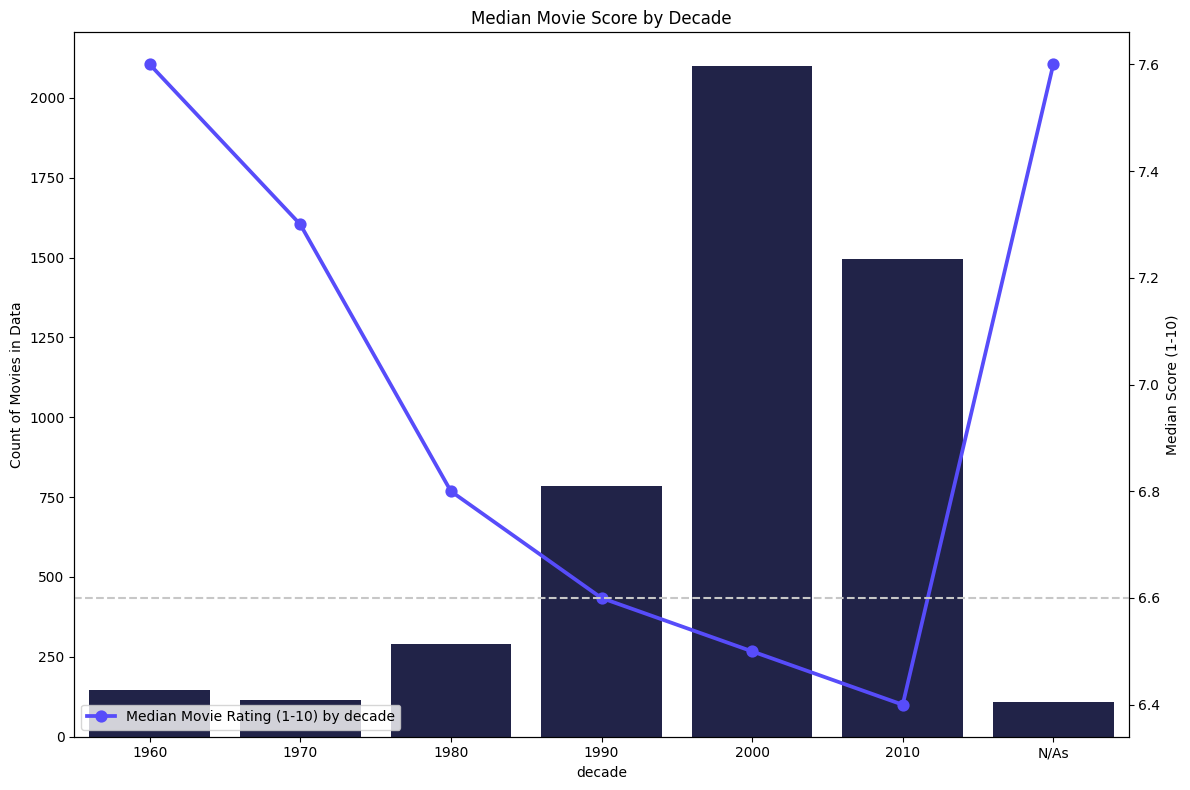

In [9]:
p = plot_median_movie_score_over_time(df)
plt.show(p)

***

* the median user review is getting lower and lower, users on IMDB think the quality of movies released is lower and lower
* we also see the need to really improve our data quality as the 108 movies that don't have a title year are also the ones that are highly rated.

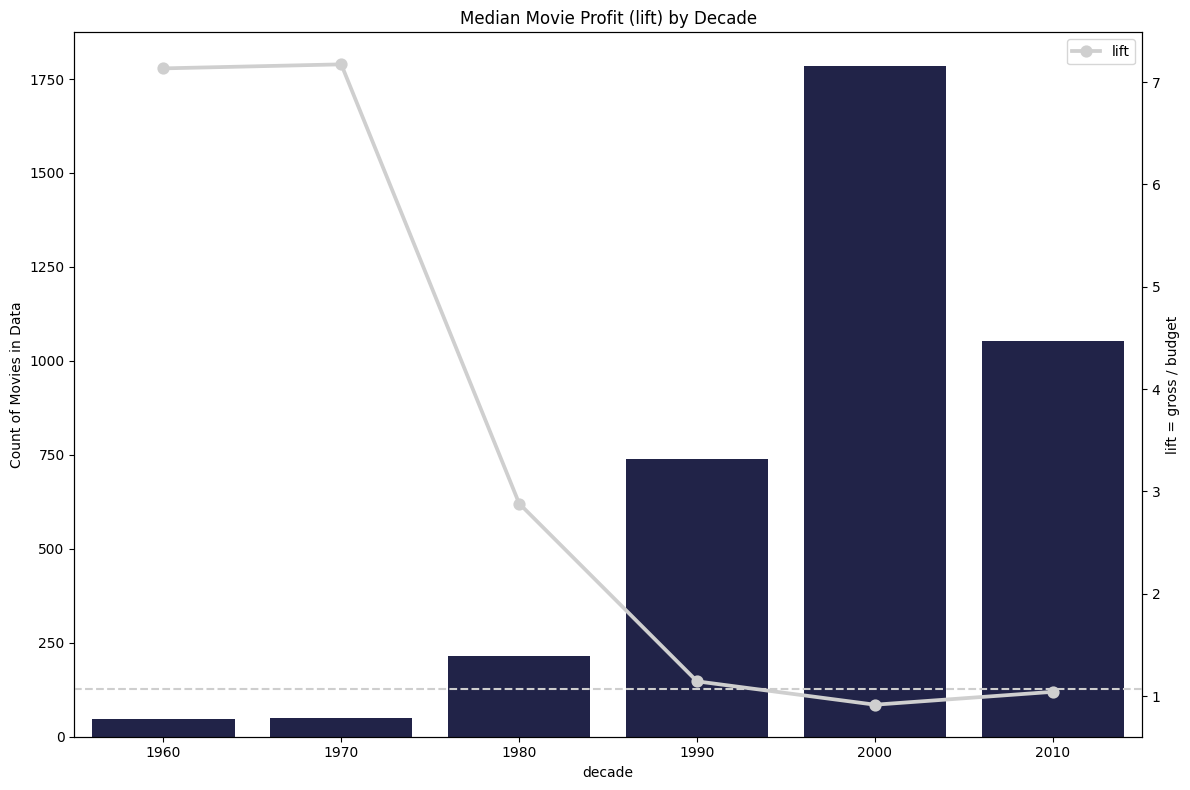

In [10]:
p = plot_median_movie_lift_over_time(df)
plt.show(p)

***

* at the same time the number of movies is exploding and the quality of the reviews dropping the profitability is dropping